In [9]:
import pandas as pd 
from astropy.table import Table
from astropy import units as u
import matplotlib.pyplot as plt
from glob import glob
import os

In [10]:
#change to the camera that you would like to use
camera="wfc3ir"
flter= "F105W"

In [11]:
file_path= "C:\\Users\\qtrme\\SkySurf\\SKYSURF_profoundmed_{c}\\{f}\\{c}_{f}_*_background.tbl.txt*".format(c=camera, f=flter)
print(file_path)

C:\Users\qtrme\SkySurf\SKYSURF_profoundmed_wfc3ir\F105W\wfc3ir_F105W_*_background.tbl.txt*


In [12]:
file_list= glob(file_path)

testfile= file_list[0]

In [13]:

# Initialize a list to store DataFrames
df_list = []

# Loop through the indices of file_list
for x in range(len(file_list)):
    testfile = file_list[x]  # Store the file path at index x
    tbl = Table.read(testfile, format='ascii')  # Read the table
    df = tbl.to_pandas()  # Convert table to a pandas DataFrame
    df_list.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in df_list
combined = pd.concat(df_list, ignore_index=True)

# Define the path to the existing CSV file where you want to merge the data
output_path = "C:\\Users\\qtrme\\SkySurf\\SKYSURF_profoundmed_{c}\\{f}\\{c}_{f}_combined.csv".format(c=camera, f=flter)

# Define the path to the external data
ext_data = "C:\\Users\\qtrme\\SkySurf\\SKYSURF_profoundmed_{c}\\SKYSURF_profoundmed_{c}_{f}.csv".format(c=camera, f=flter)

# Read the existing CSV file
edDf = pd.read_csv(ext_data)

# Rename the "root" column to "objname" in the opDf DataFrame
edDf.rename(columns={"Root": "objname"}, inplace=True)

merged_data = combined.merge(edDf, on='objname')

merged_data['HSTtobg'] = merged_data['totbg'] - merged_data['stars']

# Determine the camera name and adjust reorder accordingly
if camera in ['acswfc', 'wfc3uvis']:
    reorder = ['objname', 'ra', 'dec', 'zody', 'ism', 'cib', 'totbg', 'HSTtobg','selon',
               'Sky_e', 'RMS_e',
               'Galactic_Longitude', 'Galactic_Latitude',
               'Ecliptic_Latitude', 'Ecliptic_Longitude', 'Target_Name', 'Sun_Angle', 'Moon_Angle',
               'Sun_Altitude', 'Average_Earth_Limb_Angle',
               'Expected_RMS_e', 'Flag', 'Error_e', 'Sky_MJy/sr',
               'Sky_rms_MJy/sr', 'Error_MJy/sr', 'N_good_regions',
               'N_bad_regions', 'N_bad_pixel_regions', 'N_total_regions', 'stars', 'wavelength', 'year', 'day', 'Exp_Time',
               'Start_Time', 'Start_JD', 'Sensitivity_Jy/(e/s)']
    merged_data = merged_data[reorder]
    
elif camera == 'wfc3ir':
    reorder = ['objname', 'ra', 'dec', 'zody', 'ism', 'cib', 'totbg', 'HSTtobg', 'selon','stars',
               'Galactic_Longitude', 'Galactic_Latitude',
               'Ecliptic_Latitude', 'Ecliptic_Longitude', 'Target_Name', 'Sun_Angle', 'Moon_Angle',
               'Sun_Altitude', 'Average_Earth_Limb_Angle',
               'Expected_RMS_e/s', 'Flag', 'Sky_MJy/sr_thermcorr',
               'Sky_MJy/sr_no_thermcorr', 'Sky_rms_MJy/sr', 'Error_MJy/sr', 'N_good_regions',
               'N_bad_regions', 'N_bad_pixel_regions', 'N_total_regions', 'stars', 'wavelength', 'year', 'day', 'Exp_Time',
               'Start_Time', 'Start_JD', 'Sensitivity_Jy/(e/s)', 'Therm_Corr_MJy/sr']
    merged_data = merged_data[reorder]
    jy_to_mjy_conversion = 1e-6
    wfc3ir_pixel_area_arcsec = 0.135 * 0.121

    # Convert specific columns from Janskys to MegaJanskys
    columns_to_convert = 'Expected_RMS_e/s'
    merged_data[columns_to_convert] *= jy_to_mjy_conversion / wfc3ir_pixel_area_arcsec


merged_data = merged_data.rename(columns={'cib': 'Comsmic infrared background MJy/sr', 'ism': 'interstellar light',
                                          'stars': 'stellar light MJy/sr', 'wavelength': 'wavelengh um',
                                          'zody': 'zody MJy/sr', 'selon': 'solar elon','Expected_RMS_e/s':'Expected_RMS_MJy/sr'})

merged_data.to_csv(output_path, index=False)
print("done")


done


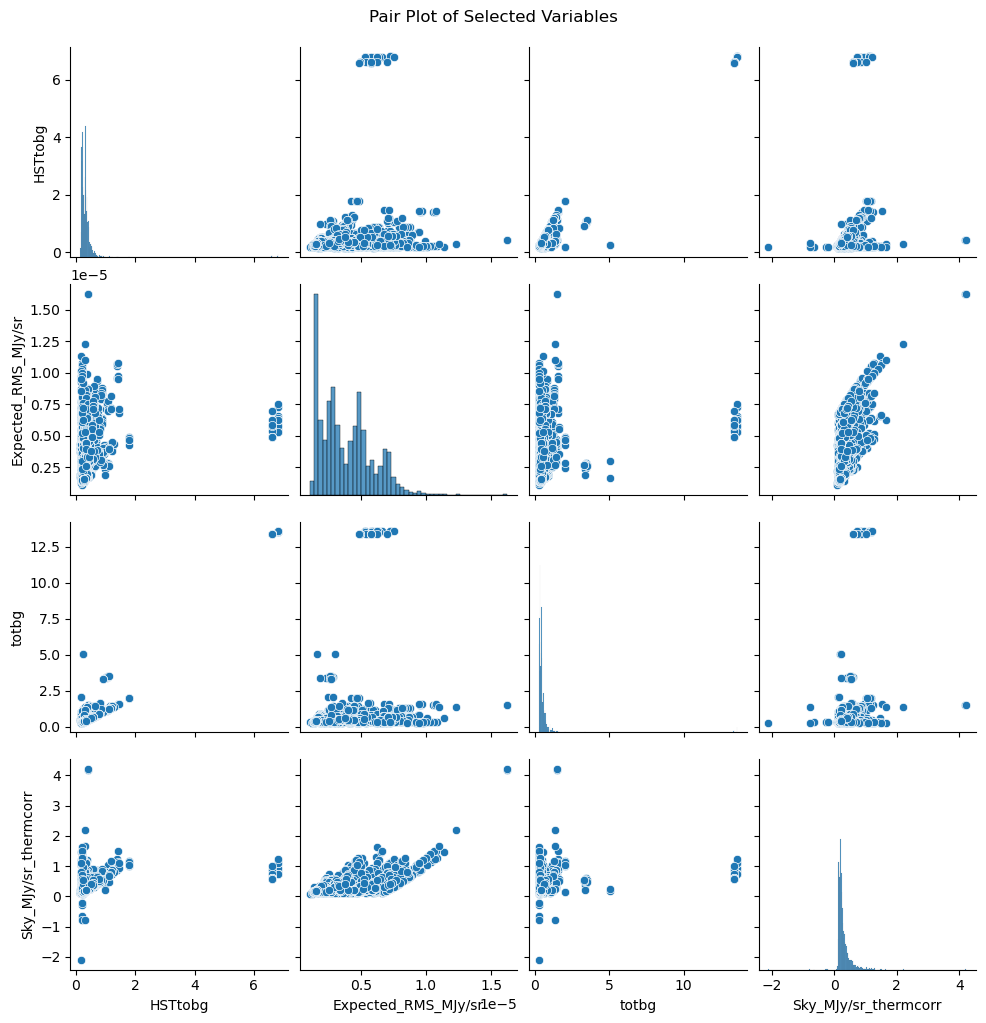

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a DataFrame
#

# Explore correlation matrix
# correlation_matrix = df.corr()

# plt.figure(figsize=(24, 20))  # Adjust the figure size for the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

selected_variables = ['HSTtobg', 'Expected_RMS_MJy/sr', 'totbg', 'Sky_MJy/sr_thermcorr']

pair_df = df[selected_variables]
sns.pairplot(pair_df)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)

plt.show()


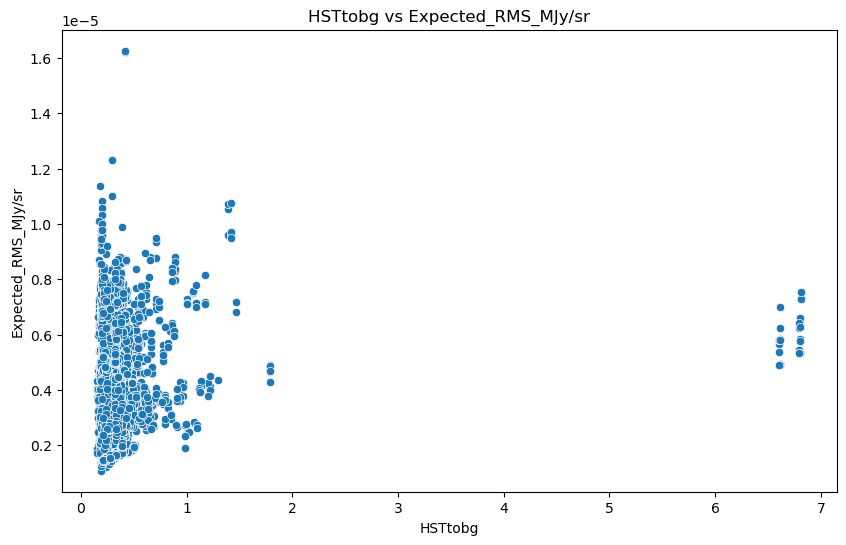

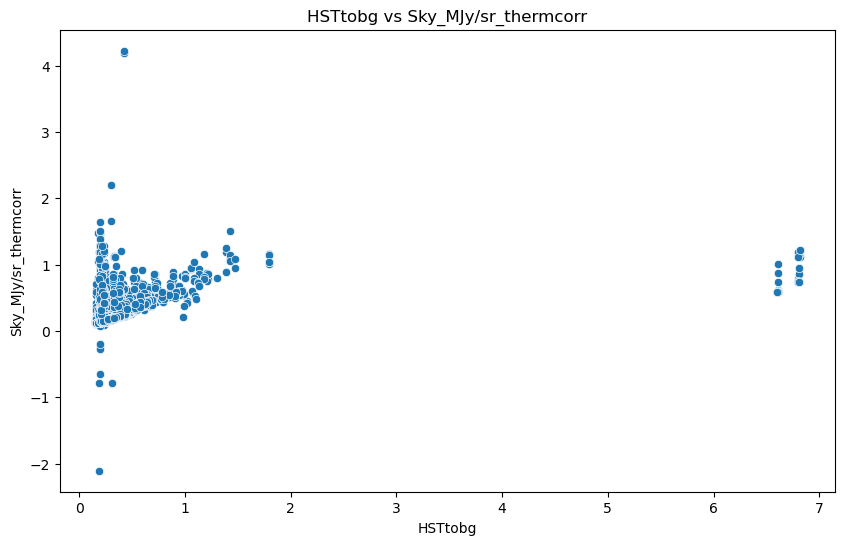

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a DataFrame
file = 'C:/Users/qtrme/SkySurf/SKYSURF_profoundmed_wfc3ir/F105W/wfc3ir_F105W_combined.csv'
df = pd.read_csv(file)

# Graph 1: HSTtobg vs Expected_RMS_MJy/sr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Expected_RMS_MJy/sr')
plt.title('HSTtobg vs Expected_RMS_MJy/sr')
plt.xlabel('HSTtobg')
plt.ylabel('Expected_RMS_MJy/sr')
plt.show()

# Graph 2: HSTtobg vs Sky_MJy/sr_thermcorr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Sky_MJy/sr_thermcorr')
plt.title('HSTtobg vs Sky_MJy/sr_thermcorr')
plt.xlabel('HSTtobg')
plt.ylabel('Sky_MJy/sr_thermcorr')
plt.show()


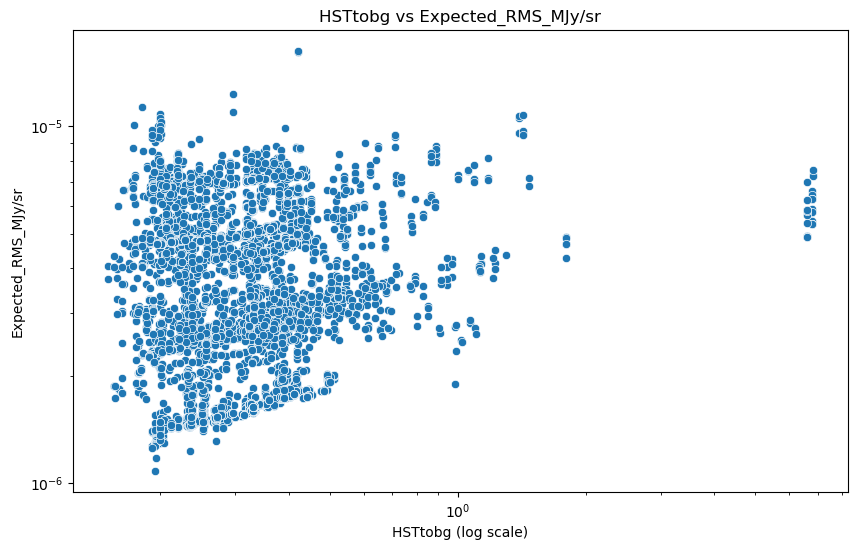

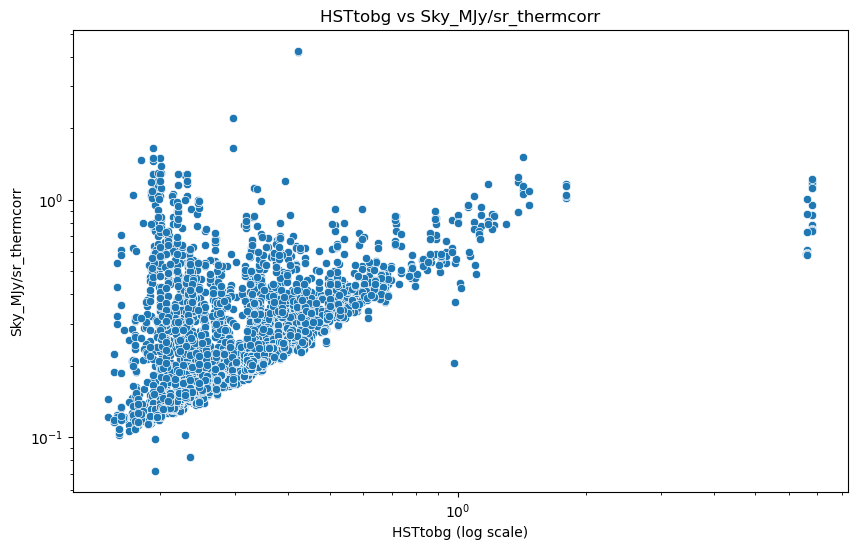

In [16]:

#LOG SCALE 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a DataFrame
file = 'C:/Users/qtrme/SkySurf/SKYSURF_profoundmed_wfc3ir/F105W/wfc3ir_F105W_combined.csv'
df = pd.read_csv(file)

# Graph 1: HSTtobg vs Expected_RMS_MJy/sr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Expected_RMS_MJy/sr')
plt.xscale('log')  
plt.yscale('log')# Set x-axis to logarithmic scale
plt.title('HSTtobg vs Expected_RMS_MJy/sr')
plt.xlabel('HSTtobg (log scale)')
plt.ylabel('Expected_RMS_MJy/sr')
plt.show()

# Graph 2: HSTtobg vs Sky_MJy/sr_thermcorr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Sky_MJy/sr_thermcorr')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')
plt.title('HSTtobg vs Sky_MJy/sr_thermcorr')
plt.xlabel('HSTtobg (log scale)')
plt.ylabel('Sky_MJy/sr_thermcorr')
plt.show()


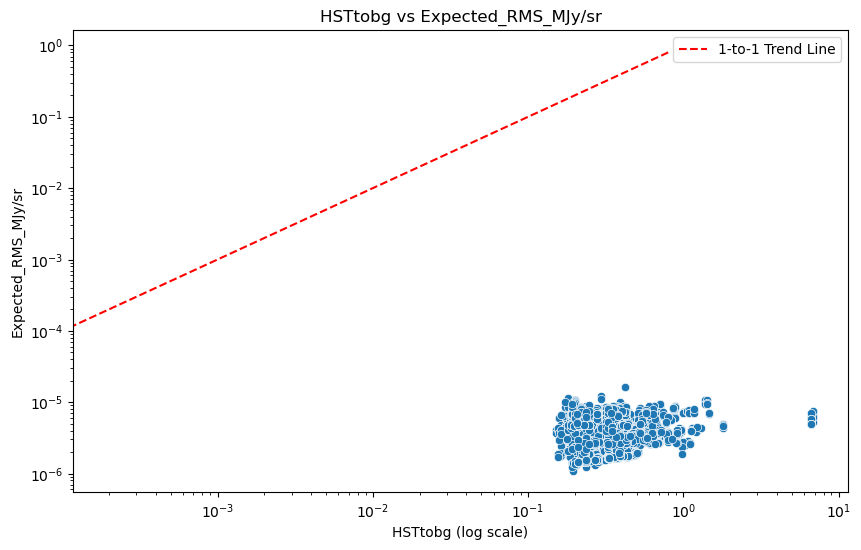

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a DataFrame
file = 'C:/Users/qtrme/SkySurf/SKYSURF_profoundmed_wfc3ir/F105W/wfc3ir_F105W_combined.csv'
df = pd.read_csv(file)

# Graph 1: HSTtobg vs Expected_RMS_MJy/sr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Expected_RMS_MJy/sr')
plt.xscale('log')
plt.yscale('log')  # Set x-axis and y-axis to logarithmic scale
sns.lineplot(x=df['HSTtobg'], y=df['HSTtobg'], color='red', linestyle='--', label='1-to-1 Trend Line')
plt.title('HSTtobg vs Expected_RMS_MJy/sr')
plt.xlabel('HSTtobg (log scale)')
plt.ylabel('Expected_RMS_MJy/sr')
plt.legend()
plt.show()

# Graph 2: HSTtobg vs Sky_MJy/sr_thermcorr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HSTtobg', y='Sky_MJy/sr_thermcorr')
plt.xscale('log')
plt.yscale('log')  # Set x-axis and y-axis to logarithmic scale
sns.lineplot(x=df['HSTtobg'], y=df['HSTtobg'], color='red', linestyle='--', label='1-to-1 Trend Line')
plt.title('HSTtobg vs Sky_MJy/sr_thermcorr')
plt.xlabel('HSTtobg (log scale)')
plt.ylabel('Sky_MJy/sr_thermcorr')
plt.legend()
plt.show()
